In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
!pip install tensorflow_hub

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [0]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [0]:

print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Version:  2.1.0
Hub version:  0.7.0
Eager mode:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [0]:


from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:

# Create data generator for training and validation

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = "/content/drive/My Drive/dotslash/classifier/dataset"

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)


Found 124 images belonging to 3 classes.
Found 502 images belonging to 3 classes.


In [0]:
# Learn more about data batches

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)


Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)


In [0]:
# Learn about dataset labels

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)



['Auto' 'Bus' 'Truck']


In [0]:


model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 16.0 steps, validate for 4.0 steps
Epoch 1/10
16/16 [==============================] - 7s 416ms/step - loss: 1.2771 - acc: 0.4562 - val_loss: 0.7918 - val_acc: 0.6452
Epoch 2/10
16/16 [==============================] - 2s 108ms/step - loss: 0.7950 - acc: 0.6594 - val_loss: 0.5151 - val_acc: 0.8306
Epoch 3/10
16/16 [==============================] - 2s 103ms/step - loss: 0.6182 - acc: 0.7530 - val_loss: 0.4219 - val_acc: 0.8952
Epoch 4/10
16/16 [==============================] - 2s 106ms/step - loss: 0.4430 - acc: 0.8287 - val_loss: 0.3493 - val_acc: 0.8952
Epoch 5/10
16/16 [==============================] - 2s 102ms/step - loss: 0.4072 - acc: 0.8426 - val_loss: 0.3223 - val_acc: 0.8871
Epoch 6/10
16/16 [==============================] - 2s 100ms/step - loss: 0.3394 - acc: 0.8725 - val_loss: 0.3203 - val_acc: 0.9194
Epoch 7/10
16/16 [==============================] - 2s 104ms/step - loss: 0.3039 - acc: 0.8944 - val_loss: 0.2879 - val_acc: 0.9032
Epoch 8/10
16/16 [=============

In [0]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


4/4 [==============================] - 0s 85ms/step - loss: 0.2878 - acc: 0.9355


In [0]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.29
Final accuracy: 93.55%


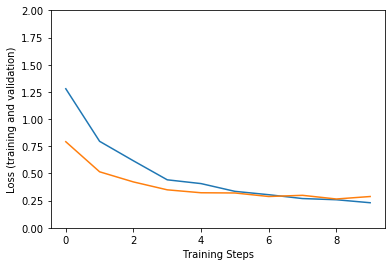

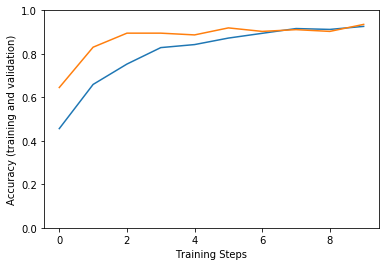

In [0]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [0]:
FLOWERS_SAVED_MODEL = "/content/drive/My Drive/model/classifier_auto3"
tf.saved_model.save(model, FLOWERS_SAVED_MODEL)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /content/drive/My Drive/model/classifier_auto3/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/model/classifier_auto3/assets


In [0]:
FLOWERS_SAVED_MODEL = "/content/drive/My Drive/model/classifier_auto3"
flowers_model = hub.load(FLOWERS_SAVED_MODEL)

print(flowers_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f8be147cf98>


In [0]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)


Validation batch shape: (32, 224, 224, 3)


In [0]:
tf_model_predictions = flowers_model(val_image_batch)
#tf_model_predictions = model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)


Prediction results shape: (32, 3)


In [0]:
tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Auto,Bus,Truck
0,0.98195040,0.01549968,0.00254982
1,0.54490662,0.38823593,0.06685749
2,0.00798093,0.98419881,0.00782023
3,0.79788274,0.12471913,0.07739814
4,0.86430919,0.09728306,0.03840775


In [0]:


predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]



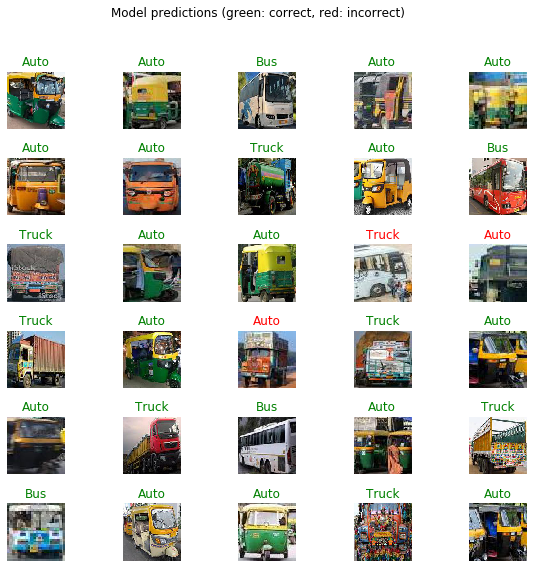

In [0]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")


In [0]:

%cd "/content/drive/My Drive/model/"

/content/drive/My Drive/model


In [0]:
!mkdir "tflite_models"

mkdir: cannot create directory ‘tflite_models’: File exists


In [0]:
TFLITE_MODEL = "tflite_models/auto_truck.tflite"
TFLITE_QUANT_MODEL = "tflite_models/auto_truck_quant.tflite"

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f735b2cfa90>


In [0]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : flowers_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 11M
-rw------- 1 root root 2.3M Feb 29 17:54 auto_truck_quant.tflite
-rw------- 1 root root 8.5M Feb 29 17:54 auto_truck.tflite


In [0]:
tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 3]
type: <class 'numpy.float32'>


In [0]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [32  3]
type: <class 'numpy.float32'>


In [0]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)


Prediction results shape: (32, 3)


In [0]:
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = dataset_labels

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

TFLite prediction results for the first elements


,Auto,Bus,Truck
0,0.98195040,0.01549968,0.00254982
1,0.54490793,0.38823441,0.06685767
2,0.00798094,0.98419881,0.00782021
3,0.79788375,0.12471797,0.07739832
4,0.86431080,0.09728178,0.03840741


In [0]:
# Load quantized TFLite model
tflite_interpreter_quant = tf.lite.Interpreter(model_path=TFLITE_QUANT_MODEL)

# Learn about its input and output details
input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

# Resize input and output tensors to handle batch of 32 images
tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter_quant.allocate_tensors()

input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

# Run inference
tflite_interpreter_quant.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter_quant.invoke()

tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
print("\nPrediction results shape:", tflite_q_model_predictions.shape)

== Input details ==
name: x
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [32  3]
type: <class 'numpy.float32'>

Prediction results shape: (32, 3)


In [0]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)
tflite_q_pred_dataframe.columns = dataset_labels

print("Quantized TFLite model prediction results for the first elements")
tflite_q_pred_dataframe.head()

Quantized TFLite model prediction results for the first elements


,Auto,Bus,Truck
0,0.98298335,0.01226116,0.00475547
1,0.07349209,0.27021164,0.65629631
2,0.00405779,0.93873584,0.05720636
3,0.44488409,0.22197959,0.33313638
4,0.41452116,0.20094806,0.38453087


In [0]:
# Concatenate results from all models

all_models_dataframe = pd.concat([tf_pred_dataframe, 
                                  tflite_pred_dataframe, 
                                  tflite_q_pred_dataframe], 
                                 keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                 axis='columns')
all_models_dataframe.head()

TF Model                          ... TFLite quantized                        
         Auto         Bus       Truck  ...             Auto         Bus       Truck
0  0.98195040  0.01549968  0.00254982  ...       0.98298335  0.01226116  0.00475547
1  0.54490662  0.38823593  0.06685749  ...       0.07349209  0.27021164  0.65629631
2  0.00798093  0.98419881  0.00782023  ...       0.00405779  0.93873584  0.05720636
3  0.79788274  0.12471913  0.07739814  ...       0.44488409  0.22197959  0.33313638
4  0.86430919  0.09728306  0.03840775  ...       0.41452116  0.20094806  0.38453087

[5 rows x 9 columns]

In [0]:
# Swap columns to hava side by side comparison

all_models_dataframe = all_models_dataframe.swaplevel(axis='columns')[tflite_pred_dataframe.columns]
all_models_dataframe.head()

Auto              ...       Truck                 
     TF Model      TFLite  ...      TFLite TFLite quantized
0  0.98195040  0.98195040  ...  0.00254982       0.00475547
1  0.54490662  0.54490793  ...  0.06685767       0.65629631
2  0.00798093  0.00798094  ...  0.00782021       0.05720636
3  0.79788274  0.79788375  ...  0.07739832       0.33313638
4  0.86430919  0.86431080  ...  0.03840741       0.38453087

[5 rows x 9 columns]

In [0]:
# Highlight TFLite models predictions that are different from original model

def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('TF Model', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

all_models_dataframe.style.apply(highlight_diff, axis=None)


In [0]:
# Concatenation of argmax and max value for each row
def max_values_only(data):
  argmax_col = np.argmax(data, axis=1).reshape(-1, 1)
  max_col = np.max(data, axis=1).reshape(-1, 1)
  return np.concatenate([argmax_col, max_col], axis=1)

# Build simplified prediction tables
tf_model_pred_simplified = max_values_only(tf_model_predictions)
tflite_model_pred_simplified = max_values_only(tflite_model_predictions)
tflite_q_model_pred_simplified = max_values_only(tflite_q_model_predictions)


In [0]:
# Build DataFrames and present example
columns_names = ["Label_id", "Confidence"]
tf_model_simple_dataframe = pd.DataFrame(tf_model_pred_simplified)
tf_model_simple_dataframe.columns = columns_names

tflite_model_simple_dataframe = pd.DataFrame(tflite_model_pred_simplified)
tflite_model_simple_dataframe.columns = columns_names

tflite_q_model_simple_dataframe = pd.DataFrame(tflite_q_model_pred_simplified)
tflite_q_model_simple_dataframe.columns = columns_names

tf_model_simple_dataframe.head()

,Label_id,Confidence
0,0.0,0.98195040
1,0.0,0.54490662
2,1.0,0.98419881
3,0.0,0.79788274
4,0.0,0.86430919


In [0]:
# Concatenate results from all models
all_models_simple_dataframe = pd.concat([tf_model_simple_dataframe, 
                                         tflite_model_simple_dataframe, 
                                         tflite_q_model_simple_dataframe], 
                                        keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                        axis='columns')

# Swap columns for side-by-side comparison
all_models_simple_dataframe = all_models_simple_dataframe.swaplevel(axis='columns')[tf_model_simple_dataframe.columns]

# Highlight differences
all_models_simple_dataframe.style.apply(highlight_diff, axis=None)

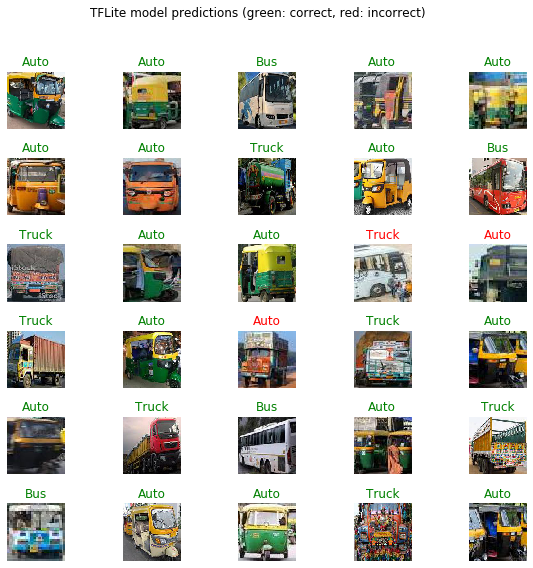

In [0]:


# Print images batch and labels predictions for TFLite Model

tflite_predicted_ids = np.argmax(tflite_model_predictions, axis=-1)
tflite_predicted_labels = dataset_labels[tflite_predicted_ids]
tflite_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(tflite_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("TFLite model predictions (green: correct, red: incorrect)")



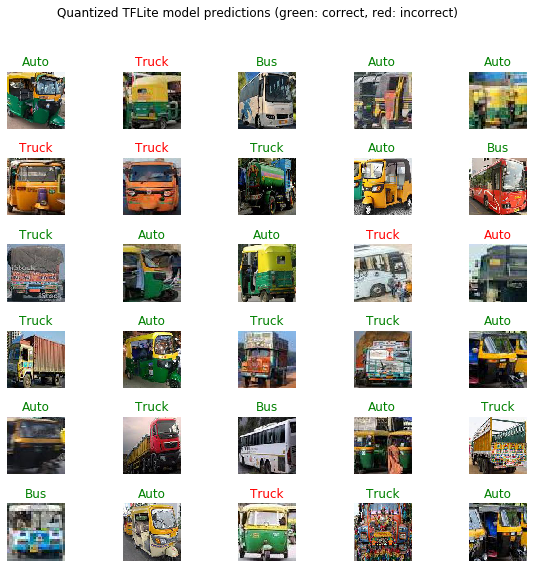

In [0]:
# Print images batch and labels predictions for TFLite Model

tflite_q_predicted_ids = np.argmax(tflite_q_model_predictions, axis=-1)
tflite_q_predicted_labels = dataset_labels[tflite_q_predicted_ids]
tflite_q_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_q_predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(tflite_q_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Quantized TFLite model predictions (green: correct, red: incorrect)")



In [0]:
from PIL import Image

In [0]:
VAL_BATCH_DIR = "validation_batch"


In [0]:
!mkdir {VAL_BATCH_DIR}

In [0]:
# Export batch to *.jpg files with specific naming convention.
# Make sure they are exported in the full quality, otherwise the inference
# process will return different results. 

for n in range(32):
  filename = "n{:0.0f}_true{:0.0f}_pred{:0.0f}.jpg".format(
      n,
      true_label_ids[n],
      tflite_model_pred_simplified[n][0]
  )
  img_arr = np.copy(val_image_batch[n])
  img_arr *= 255
  img_arr = img_arr.astype("uint8")
  img11 = Image.fromarray(img_arr, 'RGB')
  img11.save("{}/{}".format(VAL_BATCH_DIR, filename), "JPEG", quality=100)

In [0]:
!tar -zcvf {VAL_BATCH_DIR}.tar.gz {VAL_BATCH_DIR}

validation_batch/
validation_batch/n0_true0_pred0.jpg
validation_batch/n1_true0_pred0.jpg
validation_batch/n2_true1_pred1.jpg
validation_batch/n3_true0_pred0.jpg
validation_batch/n4_true0_pred0.jpg
validation_batch/n5_true0_pred0.jpg
validation_batch/n6_true0_pred0.jpg
validation_batch/n7_true2_pred2.jpg
validation_batch/n8_true0_pred0.jpg
validation_batch/n9_true1_pred1.jpg
validation_batch/n10_true2_pred2.jpg
validation_batch/n11_true0_pred0.jpg
validation_batch/n12_true0_pred0.jpg
validation_batch/n13_true1_pred2.jpg
validation_batch/n14_true2_pred0.jpg
validation_batch/n15_true2_pred2.jpg
validation_batch/n16_true0_pred0.jpg
validation_batch/n17_true2_pred0.jpg
validation_batch/n18_true2_pred2.jpg
validation_batch/n19_true0_pred0.jpg
validation_batch/n20_true0_pred0.jpg
validation_batch/n21_true2_pred2.jpg
validation_batch/n22_true1_pred1.jpg
validation_batch/n23_true0_pred0.jpg
validation_batch/n24_true2_pred2.jpg
validation_batch/n25_true1_pred1.jpg
validation_batch/n26_true0_pre